# Forcasting with LSTM on NGA time serie

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('../omar/Data/test_st.csv')
df2 = pd.read_csv('../omar/Data/extaction_missing_data.csv') 

In [3]:
df

,value_created_at,measure_id,point_id,NGA,NGV,K,VCC_g,VC_g
0,2023-06-24 15:05:48,12870679,232710,0.10832,2.77359,1.891347,0.49635,0.41004
1,2023-06-24 15:22:51,12870678,232710,0.10783,3.13995,1.896530,0.48180,0.42522
2,2023-06-24 15:50:00,12870677,232710,0.10815,2.66659,1.887733,0.48101,0.40710
3,2023-06-24 15:55:00,12870676,232710,0.10708,2.65100,1.901864,0.48632,0.40771
4,2023-06-24 16:00:00,12870675,232710,0.10750,2.55173,1.898690,0.49191,0.42289
...,...,...,...,...,...,...,...,...
5699,2024-03-01 06:40:00,21130040,232710,0.54927,4.42352,4.068230,9.18245,4.87565
5700,2024-03-01 07:40:00,21132241,232710,0.52915,4.16160,4.259252,8.98788,5.14323
5701,2024-03-01 08:40:00,21134403,232710,0.55540,4.46625,4.059374,8.60813,4.33526
5702,2024-03-01 09:40:00,21136658,232710,0.50074,4.34932,4.110944,7.49714,3.75781


In [4]:
df2

,Unnamed: 0,value_created_at,measure_id,NGA,NGV,K,VCC_g,VC_g
0,0,2022-01-15 21:08:32,4055996,0.230,0.420,0.000000,0.000000,0.000000
1,1,2022-01-15 21:25:21,4056494,0.230,0.390,0.000000,0.000000,0.000000
2,2,2022-01-16 01:25:21,4059012,0.240,0.440,0.000000,0.000000,0.000000
3,3,2022-01-16 05:25:21,4061956,0.240,0.420,0.000000,0.000000,0.000000
4,4,2022-01-16 09:25:21,4064764,0.240,0.430,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...
9729,9729,2024-08-12 22:57:28,28098744,0.413,0.471,4.117731,5.701956,2.880685
9730,9730,2024-08-13 00:57:28,28102034,0.410,0.500,4.170659,5.707357,3.037322
9731,9731,2024-08-13 02:57:28,28105174,0.418,0.508,4.137773,5.385080,2.833874
9732,9732,2024-08-13 04:57:28,28108468,0.415,0.532,4.069019,5.228443,2.776260


In [5]:
df.index = pd.to_datetime(df['value_created_at'])
df2.index = pd.to_datetime(df2['value_created_at'])

In [6]:
df

,value_created_at,measure_id,point_id,NGA,NGV,K,VCC_g,VC_g
value_created_at,,,,,,,,
2023-06-24 15:05:48,2023-06-24 15:05:48,12870679,232710,0.10832,2.77359,1.891347,0.49635,0.41004
2023-06-24 15:22:51,2023-06-24 15:22:51,12870678,232710,0.10783,3.13995,1.896530,0.48180,0.42522
2023-06-24 15:50:00,2023-06-24 15:50:00,12870677,232710,0.10815,2.66659,1.887733,0.48101,0.40710
2023-06-24 15:55:00,2023-06-24 15:55:00,12870676,232710,0.10708,2.65100,1.901864,0.48632,0.40771
2023-06-24 16:00:00,2023-06-24 16:00:00,12870675,232710,0.10750,2.55173,1.898690,0.49191,0.42289
...,...,...,...,...,...,...,...,...
2024-03-01 06:40:00,2024-03-01 06:40:00,21130040,232710,0.54927,4.42352,4.068230,9.18245,4.87565
2024-03-01 07:40:00,2024-03-01 07:40:00,21132241,232710,0.52915,4.16160,4.259252,8.98788,5.14323
2024-03-01 08:40:00,2024-03-01 08:40:00,21134403,232710,0.55540,4.46625,4.059374,8.60813,4.33526


In [7]:
df2

,Unnamed: 0,value_created_at,measure_id,NGA,NGV,K,VCC_g,VC_g
value_created_at,,,,,,,,
2022-01-15 21:08:32,0,2022-01-15 21:08:32,4055996,0.230,0.420,0.000000,0.000000,0.000000
2022-01-15 21:25:21,1,2022-01-15 21:25:21,4056494,0.230,0.390,0.000000,0.000000,0.000000
2022-01-16 01:25:21,2,2022-01-16 01:25:21,4059012,0.240,0.440,0.000000,0.000000,0.000000
2022-01-16 05:25:21,3,2022-01-16 05:25:21,4061956,0.240,0.420,0.000000,0.000000,0.000000
2022-01-16 09:25:21,4,2022-01-16 09:25:21,4064764,0.240,0.430,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...
2024-08-12 22:57:28,9729,2024-08-12 22:57:28,28098744,0.413,0.471,4.117731,5.701956,2.880685
2024-08-13 00:57:28,9730,2024-08-13 00:57:28,28102034,0.410,0.500,4.170659,5.707357,3.037322
2024-08-13 02:57:28,9731,2024-08-13 02:57:28,28105174,0.418,0.508,4.137773,5.385080,2.833874


In [8]:
nga = df['NGA']
nga2 = df2['NGA']

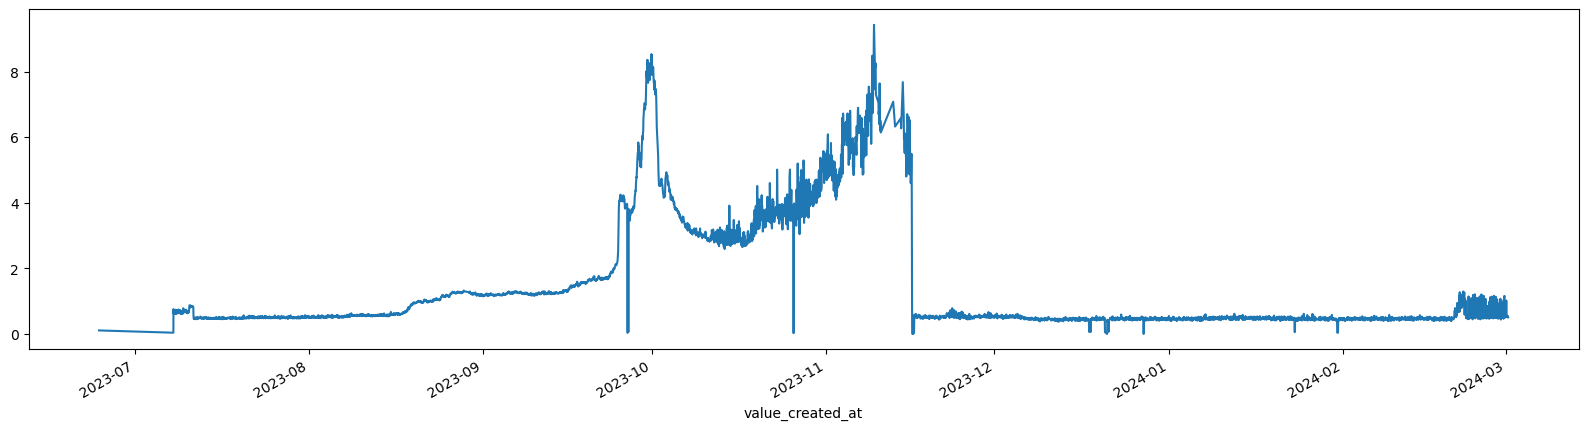

In [9]:
fig, ax = plt.subplots(figsize=(20, 5))
nga.plot();

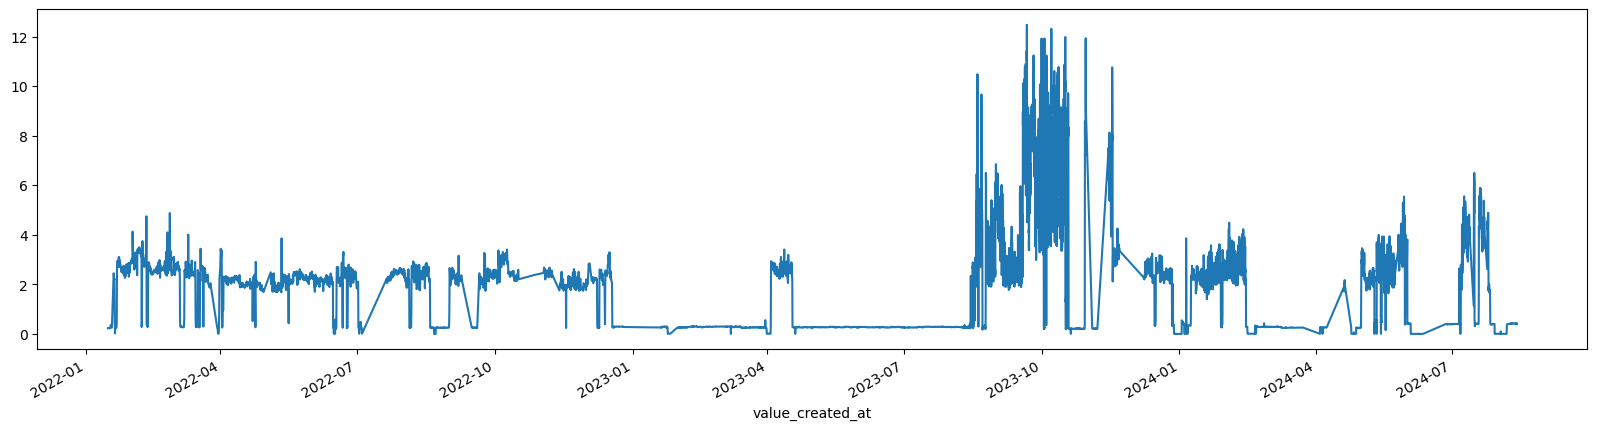

In [10]:
fig, ax = plt.subplots(figsize=(20, 5))
nga2.plot();

In [11]:
nga.index

DatetimeIndex(['2023-06-24 15:05:48', '2023-06-24 15:22:51',
               '2023-06-24 15:50:00', '2023-06-24 15:55:00',
               '2023-06-24 16:00:00', '2023-06-24 16:05:00',
               '2023-06-24 16:10:00', '2023-06-24 16:20:00',
               '2023-06-24 16:30:00', '2023-07-07 20:37:52',
               ...
               '2024-03-01 01:40:00', '2024-03-01 02:40:00',
               '2024-03-01 03:40:00', '2024-03-01 04:40:00',
               '2024-03-01 05:40:00', '2024-03-01 06:40:00',
               '2024-03-01 07:40:00', '2024-03-01 08:40:00',
               '2024-03-01 09:40:00', '2024-03-01 10:40:00'],
              dtype='datetime64[ns]', name='value_created_at', length=5704, freq=None)

In [12]:
nga2.index

DatetimeIndex(['2022-01-15 21:08:32', '2022-01-15 21:25:21',
               '2022-01-16 01:25:21', '2022-01-16 05:25:21',
               '2022-01-16 09:25:21', '2022-01-16 13:25:21',
               '2022-01-16 17:25:21', '2022-01-16 21:25:21',
               '2022-01-17 01:25:21', '2022-01-17 05:25:21',
               ...
               '2024-08-12 15:24:56', '2024-08-12 16:57:27',
               '2024-08-12 17:02:31', '2024-08-12 18:57:28',
               '2024-08-12 20:57:28', '2024-08-12 22:57:28',
               '2024-08-13 00:57:28', '2024-08-13 02:57:28',
               '2024-08-13 04:57:28', '2024-08-13 06:57:28'],
              dtype='datetime64[ns]', name='value_created_at', length=9734, freq=None)

In [13]:
diff = np.diff(nga.index)/1e9
diff = diff.astype(np.int32)
diff

array([1023, 1629,  300, ..., 3600, 3600, 3600])

In [14]:
diff2 = np.diff(nga2.index)/1e9
diff2 = diff2.astype(np.int32)
diff2

array([ 1009, 14400, 14400, ...,  7200,  7200,  7200])

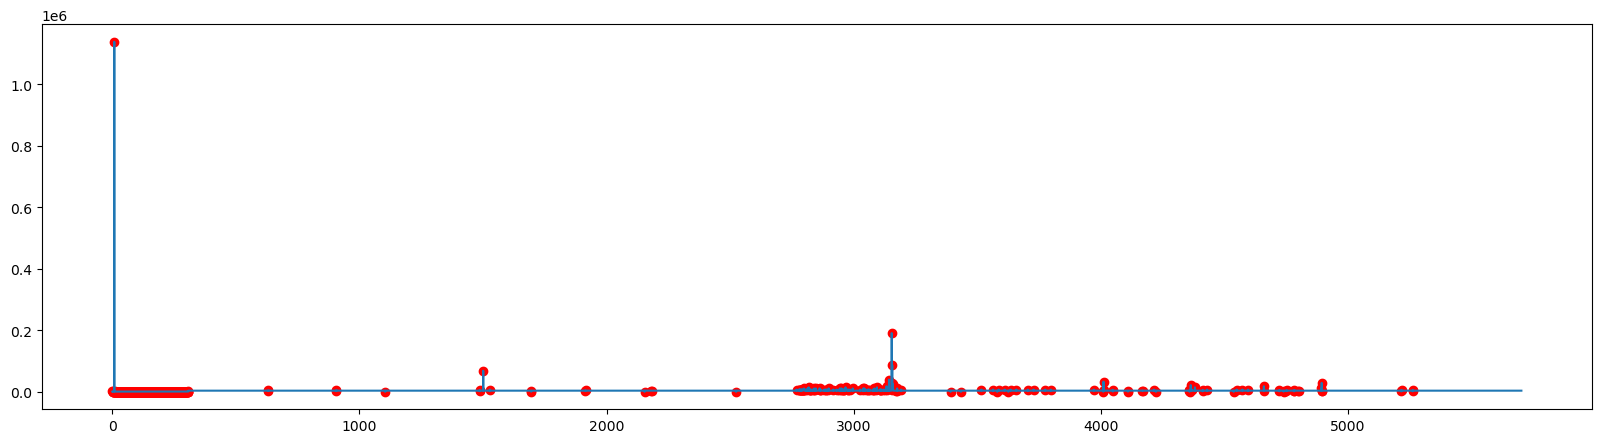

In [15]:
fig, ax = plt.subplots(figsize=(20, 5))
plt.plot(diff)
plt.scatter(x=np.where(diff!=3600), y=diff[diff!=3600], color='red')

(3000.0, 8000.0)

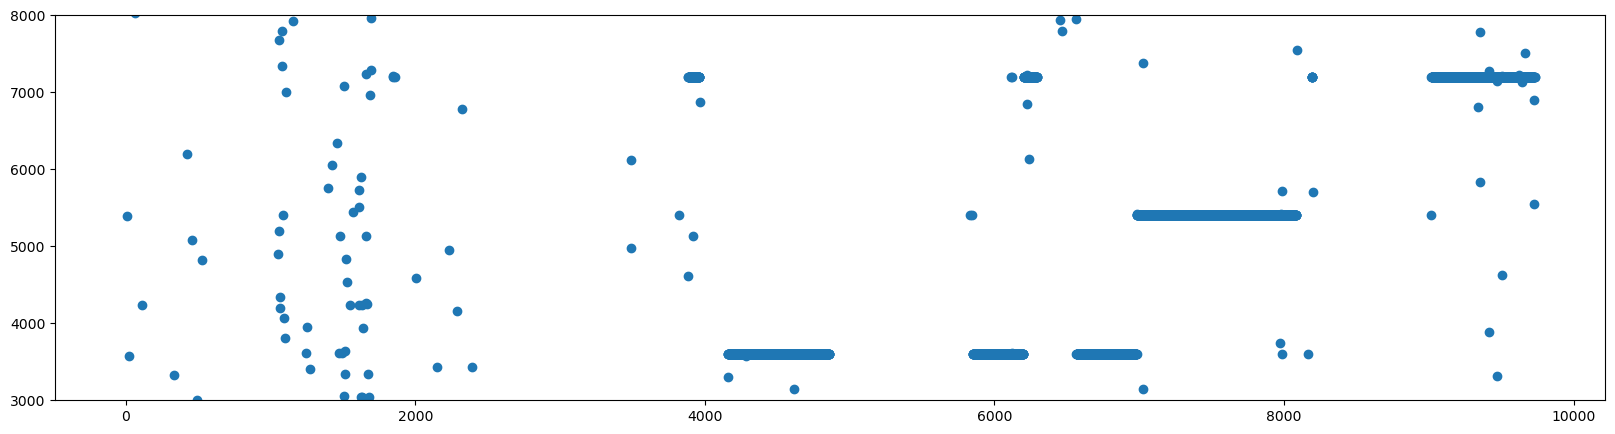

In [16]:
fig, ax = plt.subplots(figsize=(20, 5))
#plt.plot(diff2)
#plt.scatter(x=np.where(diff2!=3600), y=diff2[diff2!=3600], color='red')
plt.scatter(x=np.array(range(len(diff2))), y=diff2)
plt.ylim([3000, 8000])

In [17]:
np.median(diff2)

5400.0

<b>Remarks:</b>
- From the above plot we can see that not all points are 1-hour separated
- And inconsistencies are occuring everywhere
- Thus, we cannot have sufficient interval with 1-hour separated points
- A possible solution is make an interpolation with available points, then sample every 1 hour from the interpolation 

In [18]:
def df_to_X_y(df, window_size=5, delay=1):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size-delay+1):
    row = [[a] for a in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size+delay-1]
    y.append(label)
  return np.array(X), np.array(y)

In [19]:
WINDOW_SIZE = 382
DELAY = 1
X, y = df_to_X_y(nga, WINDOW_SIZE, DELAY)
X.shape, y.shape

((5322, 382, 1), (5322,))

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.55, shuffle=False)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, shuffle=False)
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((1915, 382, 1), (1915,), (479, 382, 1), (479,), (2928, 382, 1), (2928,))

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError, MAE
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam, SGD

model1 = Sequential()
model1.add(InputLayer((WINDOW_SIZE, 1)))
model1.add(LSTM(28,
           dropout=0.06297029003850252,
           recurrent_dropout=0.5818137908766273))
model1.add(Dense(55, 'relu'))
model1.add(Dense(1, 'linear'))

model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 28)             │         3,360 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 55)             │         1,595 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            56 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,011 (19.57 KB)

 Trainable params: 5,011 (19.57 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
cp1 = ModelCheckpoint('model_nga_1h_2.keras', save_best_only=True)
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.007009812507590492))

In [23]:
history = model1.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, callbacks=[cp1])

Epoch 1/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 11s 129ms/step - loss: 0.9457 - val_loss: 0.1766
Epoch 2/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 8s 128ms/step - loss: 0.1492 - val_loss: 0.0771
Epoch 3/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 8s 125ms/step - loss: 0.2069 - val_loss: 0.0592
Epoch 4/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 8s 125ms/step - loss: 0.2289 - val_loss: 0.0447
Epoch 5/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 7s 124ms/step - loss: 0.2278 - val_loss: 0.1197
Epoch 6/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 7s 122ms/step - loss: 0.1163 - val_loss: 0.0655
Epoch 7/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 8s 125ms/step - loss: 0.1031 - val_loss: 0.1155
Epoch 8/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 7s 121ms/step - loss: 0.1216 - val_loss: 0.1478
Epoch 9/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 8s 126ms/step - loss: 0.1205 - val_loss: 0.0919
Epoch 10/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 7s 123ms/step - loss: 0.1621 - val_loss: 0.2378


In [24]:
from tensorflow.keras.models import load_model
model1 = load_model('model_nga_1h_2.keras')

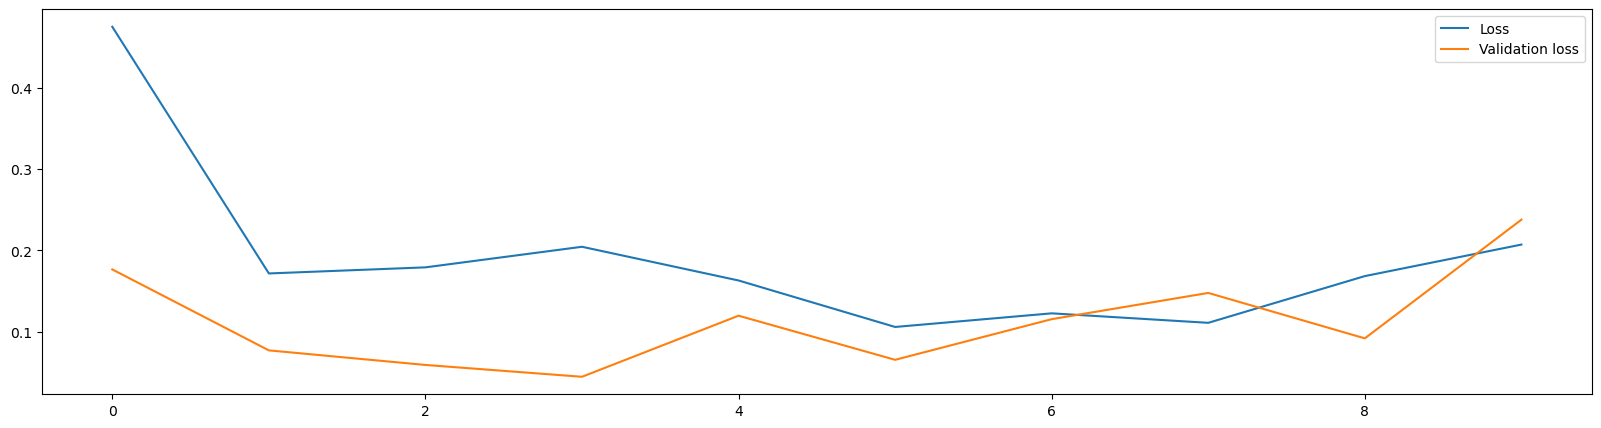

In [25]:
fig, ax = plt.subplots(figsize=(20, 5))
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

In [26]:
train_predictions = model1.predict(X_train).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train})
train_results

60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step


,Train Predictions,Actuals
0,0.511103,0.49800
1,0.505328,0.49498
2,0.502594,0.47803
3,0.507132,0.48509
4,0.507570,0.50724
...,...,...
1910,7.730880,8.13306
1911,7.737352,7.83652
1912,7.633899,7.70279
1913,7.555564,7.63318


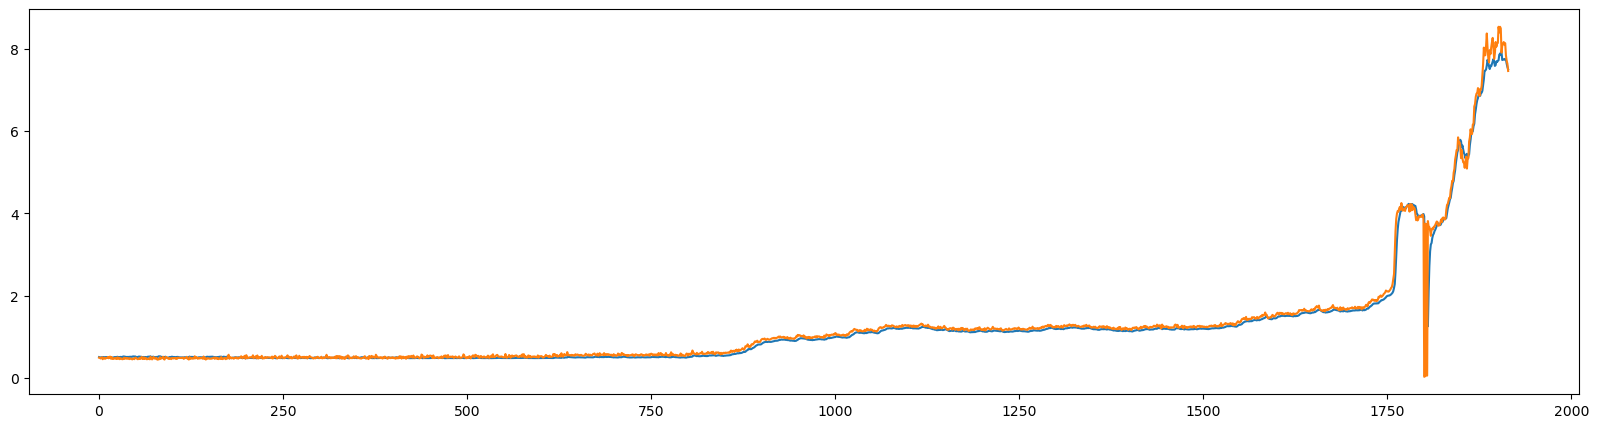

In [27]:
fig, ax = plt.subplots(figsize=(20, 5))
plt.plot(train_results['Train Predictions'])
plt.plot(train_results['Actuals'])

In [28]:
val_predictions = model1.predict(X_val).flatten()
val_results = pd.DataFrame(data={'Val Predictions':val_predictions, 'Actuals':y_val})
val_results

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step


,Val Predictions,Actuals
0,7.406357,7.73697
1,7.476124,7.51359
2,7.402174,7.48536
3,7.369596,7.48393
4,7.353694,7.30606
...,...,...
474,3.398057,3.25765
475,3.320012,3.80201
476,3.566517,3.28693
477,3.393317,3.59670


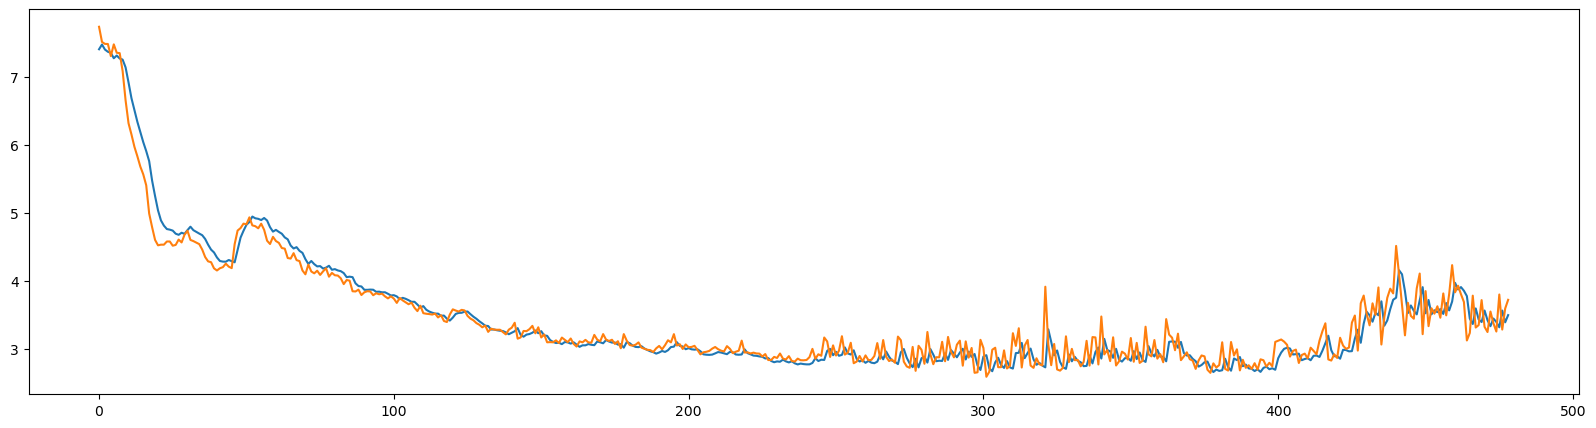

In [29]:
fig, ax = plt.subplots(figsize=(20, 5))
plt.plot(val_results['Val Predictions'])
plt.plot(val_results['Actuals'])

In [30]:
test_predictions = model1.predict(X_test).flatten()
test_results = pd.DataFrame(data={'Test Predictions':test_predictions, 'Actuals':y_test})
test_results

92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step


,Test Predictions,Actuals
0,3.602565,3.50452
1,3.534685,3.48110
2,3.502548,3.52392
3,3.510268,4.18767
4,3.856871,3.44115
...,...,...
2923,0.531008,0.54927
2924,0.520796,0.52915
2925,0.510922,0.55540
2926,0.507425,0.50074


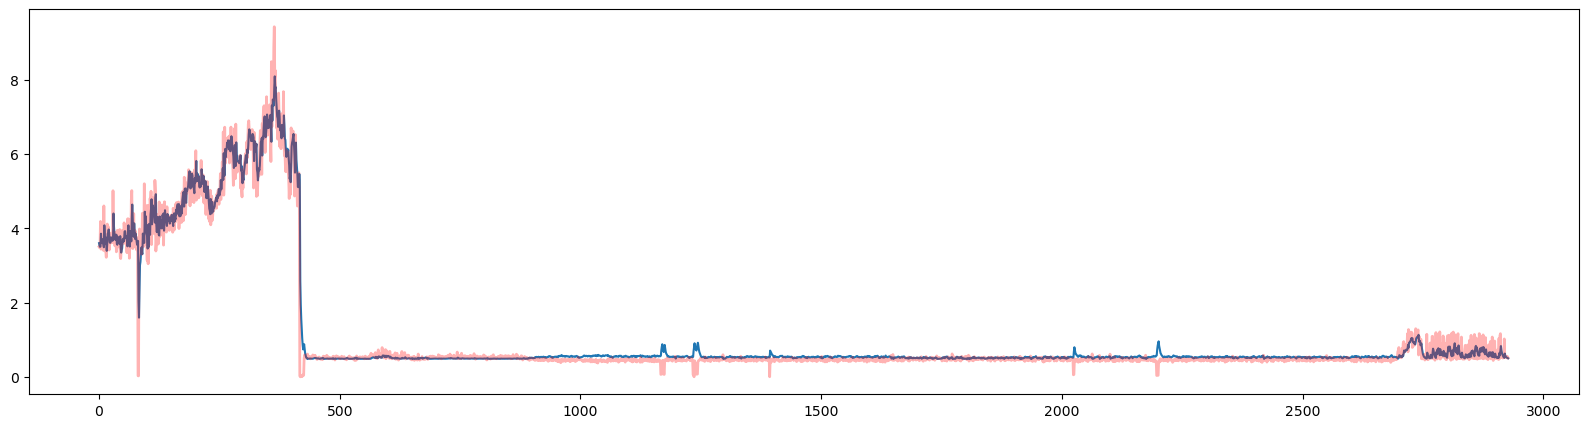

In [31]:
fig, ax = plt.subplots(figsize=(20, 5))
plt.plot(test_results['Test Predictions'])
plt.plot(test_results['Actuals'], linewidth=2, alpha=0.3, color='red')

In [32]:
from sklearn.metrics import root_mean_squared_error, mean_absolute_error
print("Test RMSE : ", root_mean_squared_error(y_test, test_predictions))
print("Test MAE : ", mean_absolute_error(y_test, test_predictions))

Test RMSE :  0.27099867826568963
Test MAE :  0.1331923731327545
